# **혼공머신 4-1 : 로지스틱 회귀**

## **문제** : 럭키백 상품 출시 ; 럭키백에 포함된 생선의 확률을 알려주고자 함

### **문제 해결 시도 1** -  k-최근접 이웃을 활용하여 이웃의 클래스 비율을 확률로 출력

***1) 데이터 준비하기***

In [93]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


**맨 왼쪽 숫자는 행 번호 (판다스의 인덱스)*

In [94]:
# 생선의 종을 중복 없이 추출
print(pd.unique(fish['Species'])) # unique() : 중복을 제거하고, 고유한(unique) 값만 뽑아주는 함수

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [95]:
# Species 열을 타깃으로 설정, 나머지 5개 열은 입력 데이터 설정
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # to_numpy() 하는 이유 : 머신러닝 바로 활용 가능

In [96]:
# 배열에서 앞 5개의 행(샘플)을 가져옴, 슬라이싱 활용
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [97]:
# 타깃 데이터 'Species'를 배열로 변환
fish_target = fish['Species'].to_numpy()

In [98]:
# 훈련 세트 / 테스트 세트 나눔
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
) # random_state = 42 : 무작위(random)로 어떤 작업을 할 때, 항상 같은 결과가 나오도록 고정시키는 값

In [99]:
# 훈련 세트 / 테스트 세트 표준화 전처리 - 스케일이 다른 특성들을 비교 가능하게 만듦
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

***2) k-최근접 이웃 분류기의 확률 예측***

In [100]:
# k-최근접 이웃 분류기 확률 예측
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3) # 가장 가까운 데이터 3개를 기준으로 판단
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target)) # score() : 분류 모델에서는 '정확도'를 의미
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


*=> 과대적합 or 과소적합 등의 일은 일어나지 않음.*

*   과대적합 : 모델의 훈련 세트 성능이 테스트 세트 성능보다 훨씬 높을 때 일어남.
*   과소적합 : 훈련 세트와 테스트 세트 성능이 모두 동일하게 낮거나 테스트 세트 성능이 오히려 높을 때



**이진 분류와 다중 분류**


*   이진 분류 : 클래스가 2개만 있음 (예: 도미 vs 빙어)
*   다중 분류 : 타깃 데이터에 2개 이상의 클래스가 포함된 문제 (책 마다 상이, 3개 이상의 클래스를 의미하는 경우 또한 존재)



In [101]:
# KNeighborsClassifier에 정렬된 타깃값
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


**참고사항*
- Bream	: 도미 (붕어와 비슷한 담수어)
- Parkki : 파르키 (핀란드 쪽 담수어, 정확한 한국어 이름은 없음)
- Perch	: 농어 (또는 유럽식 농어)
- Pike	: 강꼬치고기
- Roach	: 로치 (유럽 붕어류)
- Smelt	: 빙어
- Whitefish	: 흰살생선 (연어과에 속하는 담수어)

*사이킷런에서는 문자열로 된 타깃값 사용 가능 - 알파벳 순 (첫 번째 클래스 : 'Bream', 두 번째 클래스 : 'Parkki' ...)*

In [102]:
# 테스트 세트의 앞 5개 데이터를 이용하여 어떤 클래스인지 KNN 모델이 예측한 결과를 출력
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [103]:
# 샘플에 대한 예측 확률 확인
import numpy as np

proba = kn.predict_proba(test_scaled[:5]) # predict_proba() : 클래스별 확률값 반환
print(np.round(proba, decimals = 4)) # 소수점 네 번째 자리까지 표기 (다섯 번째 자리에서 반올림)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [104]:
# 네 번째 샘플의 최근접 이웃의 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 네 번째 샘플에 대해, 훈련 데이터에서 가장 가까운 이웃들을 찾아 거리(distances)와 인덱스(indexes)를 구함
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


*=>  'Roach'가 1개, 'Perch'가 2개 ; 다섯 번째 클래스 확률 0.3333(1/3), 세 번째 클래스 확률 0.6667(2/3)*

### **문제 해결 시도 2 - 로지스틱 회귀**

**로지스틱 회귀 : 이름과는 달리 '분류' 모델임.**


   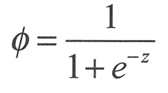



*   선형 방정식 학습
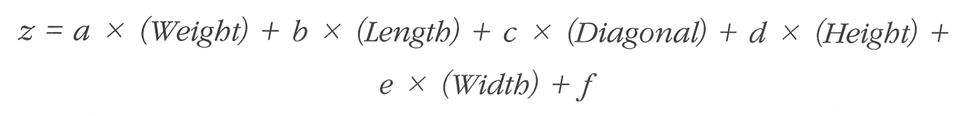
*   로지스틱 함수(시그모이드 함수) 사용 : 확률이 되려면 0~1 사이여야 함. 로지스틱 함수를 사용하면 가능
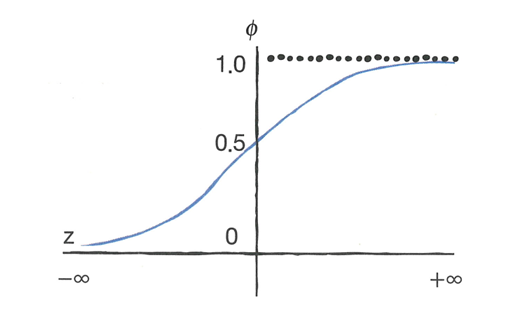

*0 ~ 1 사이 값을 0 ~ 100% 확률로 해석 가능*

❓*'로지스틱 회귀'는 분류 방법인데, 왜 '회귀'가 붙을까?*
- 겉보기엔 분류 알고리즘이지만, 선형 회귀처럼 동작하는 내부 구조를 갖고 있어서 이름에 '회귀'가 붙음.
- 로지스틱 회귀도 선형식을 기반으로 하지만, 로지스틱 함수(시그모이드 함수) 를 한 번 더 씌워서 결과를 확률(0~1) 로 바꿔줌

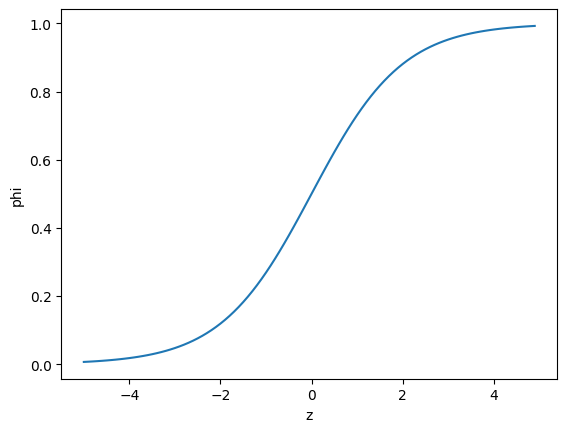

In [105]:
# -5와 5 사이에 0.1 간격으로 배열 z를 만든 후, z 위치마다 로지스틱 함수(시그모이드 함수) 계산
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # np.exp() : 지수 함수 계산
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

***1) 로지스틱 회귀로 이진 분류 수행하기***

**이진 분류일 경우,**

*   로지스틱 함수의 출력이 0.5보다 크면 : 양성 클래스
*   로지스틱 함수의 출력이 0.5보다 작으면 : 음성 클래스



**불리언 인덱싱**


*   넘파이 배열에서 True, False 값을 전달하여 행을 선택하는 것
*   True/False 값으로 된 배열을 이용해서 → True인 위치의 값만 골라낼 수 있음



In [106]:
# 'A'와 'C'를 골라내기 위해서 두 문자에 대해서만 'True'로 설정
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [107]:
# 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행 골라내기 (이진 분류 예시이기 때문)
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # True/False 리스트 생성
train_bream_smelt = train_scaled[bream_smelt_indexes] # Bream/Smelt에 해당하는 입력 데이터 출력
target_bream_smelt = train_target[bream_smelt_indexes] # Bream/Smelt에 해당하는 정답(label) 출력

In [108]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [109]:
# 훈련된 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [110]:
# 예측 확률은 predict_proba()를 통해 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


**부동소수점 오차로 값은 미세하게 다를 수 있음*

**첫 번째 열이 음성 클래스(0)에 대한 확률, 두 번째 열이 양성 클래스(1)에 대한 확률*

In [111]:
# Bream과 Smelt 중 양성 클래스 찾기
print(lr.classes_)

['Bream' 'Smelt']


**빙어(Smelt)가 양성 클래스*

In [112]:
# 로지스틱 회귀의 학습한 계수
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [113]:
# LogisticRegression 모델로 처음 5개 샘플의 z값 계산
decisions = lr.decision_function(train_bream_smelt[:5]) # decision_function() : z값 출력
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [114]:
# z값을 로지스틱 함수(시그모이드 함수)에 통과시켜 확률을 얻음
from scipy.special import expit # scipy.special : 수학에서 자주 등장하는 고급 함수들을 모아둔 곳

print(expit(decisions)) # expit : 로지스틱 함수(시그모이드 함수)

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


***2) 로지스틱 회귀로 다중 분류 수행하기***

In [115]:
# LogisticRegression 클래스로 다중 분류 모델을 훈련
lr = LogisticRegression(C = 20, max_iter = 1000) # C : LogisticRegression에서 규제를 제어하는 매개변수
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


**scikit-learn은 사용자 직관에 맞게 표현하려고 규제 강도의 역수를 C로 설정*
- C가 크면 → 제약이 약해짐 → 모델이 더 자유로움 ; 과적합 위험 증가
- C가 작으면 → 제약이 강해짐 → 모델이 단순해짐 ; 과적합 방지

**참고사항*
- C=0.01	: 매우 강한 규제 → 모델이 단순해짐
- C=1	: 적당한 규제 (기본값)
- C=10	: 꽤 약한 규제 → 모델이 복잡해짐
- C=20	: 더 약한 규제 → 모델이 더 자유롭게 학습 가능

In [116]:
# 테스트 세트 처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


**참고사항*
- Bream	: 도미 (붕어와 비슷한 담수어)
- Parkki : 파르키 (핀란드 쪽 담수어, 정확한 한국어 이름은 없음)
- Perch	: 농어 (또는 유럽식 농어)
- Pike	: 강꼬치고기
- Roach	: 로치 (유럽 붕어류)
- Smelt	: 빙어
- Whitefish	: 흰살생선 (연어과에 속하는 담수어)

In [117]:
# 위의 결과에 대한 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


**부동소수점 오차로 값은 미세하게 다를 수 있음*

In [118]:
# 클래스 정보 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [119]:
# 다중 분류일 때, 선형 방정식
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


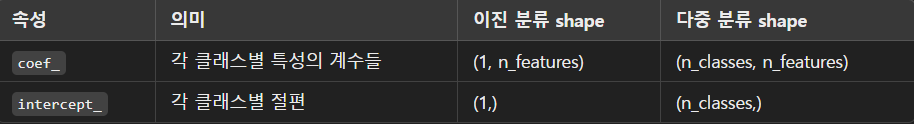

**다중 분류**


*   클래스마다 z값을 하나씩 계산하여 높은 z값을 출력하는 클래스가 예측 클래스가 됨.
*   확률 계산 방법 : 소프트맥스 함수 활용

**소프트맥스 함수란?*


*   여러 개의 선형 방정식의 출력값을 0 ~ 1사이로 압축하고, 전체 합이 1이 되도록 함.
*   지수함수를 사용하기 때문에 정규화된 지수 함수라고 불리기도 함.
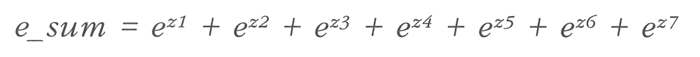
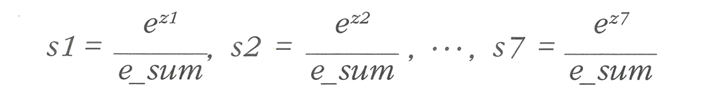





❓*LogisticRegression 에서 클래스가 2개이면 자동으로 로지스틱 함수 사용, 클래스가 3개 이상이면 자동으로 소프트맥스 함수 사용*

In [120]:
# z1 ~ z7 값을 구함
decision = lr.decision_function(test_scaled[:5]) # decision_function() : z값을 구할 수 있는 메서드
print(np.round(decision, decimals = 2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


**부동소수점 오차로 값은 미세하게 다를 수 있음*

In [121]:
# 소프트맥스 계산
from scipy.special import softmax

proba = softmax(decision, axis = 1) # decision 배열을 softmax() 함수에 전달, axis = 1로 지정하여 각 행(샘플)에 대해 소프트맥스 계산 (axis 설정 안 하면, 배열 전체에 대해 소프트맥스 계산)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
